  Grade StudyTime  Score  Pass PassOrFail
0     A      High     85     1       Pass
1     B       Low     70     1       Pass
2     C    Medium     60     0       Fail
3     A      High     90     1       Pass
4     B    Medium     75     1       Pass
5     C       Low     65     0       Fail
[0.33333333 0.66666667 0.        ]


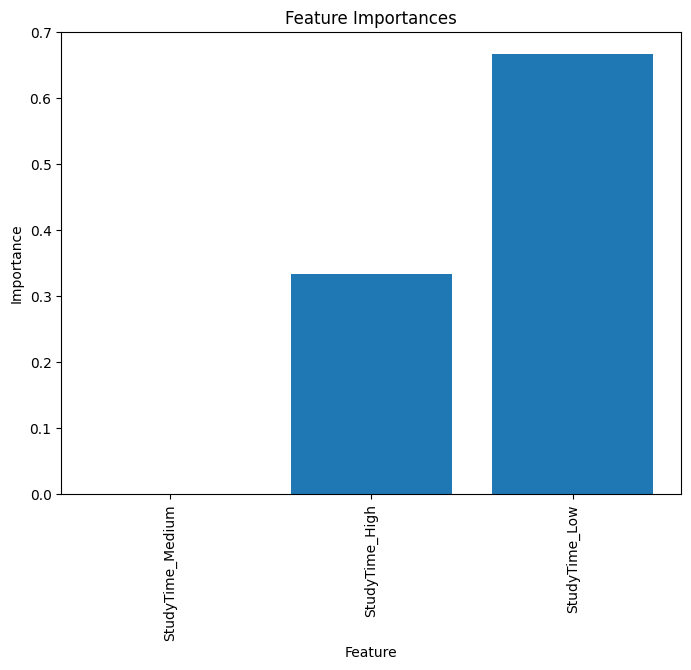

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a sample dataset
data = {
    'Grade': ['A', 'B', 'C', 'A', 'B', 'C'],
    'StudyTime': ['High', 'Low', 'Medium', 'High', 'Medium', 'Low'],
    'Score': [85, 70, 60, 90, 75, 65],
    'Pass': [1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

def passOrFail(x):
    if x==1:
        return 'Pass'
    else:
        return 'Fail'
    
df['PassOrFail'] = df['Pass'].apply(passOrFail)
# df['Pass'] = df['Pass'].apply(lambda x: 'Pass' if x == 1 else 'Fail')

print(df)

X = df[['StudyTime']]
y = df['Pass']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

importances = model.feature_importances_

print(importances)

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()